# Ray Data

There is research about using 1D rays to explore CSDs rather than taking a full
2D CSD scan.

QDFlow contains built-in functions for generating data along 1D rays for these
applications.

In [1]:
from qdflow import generate
import tutorial_helper
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc

In [2]:
# Generate a full CSD to aid in visualization, this may take ~ 20 seconds
phys = generate.default_physics(n_dots=2)
V_x = np.linspace(0., 15., 80)
V_y = np.linspace(0., 15., 80)
csd = generate.calc_2d_csd(phys, V_x, V_y)

Rays are generated starting from a central point, and extending outward in
various directions.

First we will create a list of central points from which to build the rays.
We will use a sample of quasirandom points; however, points can be selected in
any manner you choose.

Then we will define the rays as an array of displacement vectors
`[delta_x, delta_y]` that will all be added to each central point.

In [3]:
# Generate quasirandom points inside a given area
v_min, v_max = 3., 12.
num_points = 10
point_generator = qmc.Halton(d=2, scramble=False)
initial_points = qmc.scale(point_generator.random(n=num_points), v_min, v_max)

# Define a list of rays that will extend out from each point
ray_length = 3. # length of rays in mV
num_rays = 8
rays = ray_length * np.array([[np.cos(2*np.pi*i/num_rays),
                    np.sin(2*np.pi*i/num_rays)] for i in range(num_rays)])

Now the ray data can be generated using `generate.calc_rays()`.

The results will be returned in an instance of the `RaysOutput` dataclass,
which is similar to the `CSDOutput` dataclass we have been using so far.

In [4]:
resolution = 50 # points per ray

# Generate ray data, this may take ~ 10 seconds
ray_output = generate.calc_rays(phys, initial_points, rays, resolution)

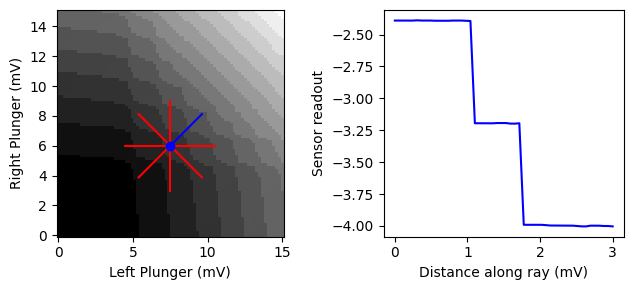

In [5]:
# Change these to show different plots
point_num_to_plot = 1 # Must be between 0 and num_points (10)
ray_num_to_plot = 1 # Must be between 0 and num_rays (8)

ray_data = ray_output.sensor[point_num_to_plot, ray_num_to_plot, :, 0]

# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(6.5,3))
tutorial_helper.plot_csd_data(fig, ax[0], csd.sensor[:,:,0], x_y_vals=(csd.V_x, csd.V_y))
tutorial_helper.overlay_rays(fig, ax[0], ray_output.centers[point_num_to_plot],
                             ray_output.rays, ray_num_to_plot)
ax[1].plot(np.linspace(0, np.linalg.norm(ray_output.rays[ray_num_to_plot]),
                       ray_output.resolution), ray_data, color="blue")
ax[1].set_xlabel("Distance along ray (mV)")
ax[1].set_ylabel("Sensor readout")
fig.tight_layout()